## 2D Geometric Linear Transformations: Theory, Algorithms, and Visualizations
This notebook explores 2D linear geometric transformations from both theoretical and practical perspectives. We introduce the matrix representations of common transformations—rotation, scaling and reflection derive their properties, and show how composition of these matrices work. Emphasis is placed on intuition (what a matrix does to points and vectors) and clear visualizations.

What you will discuss:
- How to construct and interpret 2×2 transformation matrices.
- Interactive visualizations and code examples for building and combining transformations.

How the notebook is organized:
1. Mathematical foundations and matrix forms for common transforms.
2. Plotting with matplotlib.

Prerequisites: basic familiarity with Python, NumPy, and linear algebra.

---
---

### Mathematical foundations and matrix forms for common transforms:

Any linear transformation can be summarized by where the basis vectors of the domain subspace land after applying the transformation — linearity means it preserves vector addition and scalar multiplication. **We will try to understand this statement by giving a concrete example**

**Linearity Definition:**

$$T\left(\sum_{i=1}^n c_i \mathbf{v}_i\right)=\sum_{i=1}^n c_i\,T(\mathbf{v}_i)$$

**For the standard basis:**

$$T\left(\sum_{i=1}^n c_i\,\mathbf{e}_i\right)=\sum_{i=1}^n c_i\,T(\mathbf{e}_i)$$

Now to see a concrete example, consider the 90° counterclockwise rotation.

Suppose

$$T(\mathbf{e}_1)=\begin{pmatrix}0\\1\end{pmatrix},\qquad T(\mathbf{e}_2)=\begin{pmatrix}-1\\0\end{pmatrix}.$$

For a general vector $\mathbf v = x\mathbf e_1 + y\mathbf e_2$, linearity gives

$$T(\mathbf v)=x\,T(\mathbf e_1)+y\,T(\mathbf e_2)= x\begin{pmatrix}0\\1\end{pmatrix}+y\begin{pmatrix}-1\\0\end{pmatrix}=\begin{pmatrix}-y\\x\end{pmatrix}.$$

Writing this as $T(\mathbf v)=A\mathbf v$ we see $A$ has columns $T(\mathbf e_1)$ and $T(\mathbf e_2)$, so

$$A=\begin{pmatrix}0 & -1\\1 & 0\end{pmatrix}.$$

For a general vector $\mathbf v=\begin{pmatrix}x\\y\end{pmatrix}$,

$$T(\mathbf v)=A\mathbf v=\begin{pmatrix}0 & -1\\1 & 0\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}=\begin{pmatrix}-y\\x\end{pmatrix}.$$

As we have shown the we transformed our original vector Equation into an Equivalent matrix Equation to make our notation easier.

---

**Now we have the basic idea let's see common linear transformations:**

1.For scaling by factors \(s_x\) and \(s_y\):

$$
A=\begin{pmatrix}s_x & 0\\[4pt] 0 & s_y\end{pmatrix},
\qquad
A\begin{pmatrix}x\\[4pt] y\end{pmatrix}=\begin{pmatrix}s_x x\\[4pt] s_y y\end{pmatrix}.
$$

For uniform scaling \(s\):

$$
A=sI=\begin{pmatrix}s & 0\\[4pt] 0 & s\end{pmatrix}.
$$


For reflection through the y-axis:

$$
A=\begin{pmatrix}-1 & 0\\[4pt] 0 & 1\end{pmatrix},
\qquad
A\begin{pmatrix}x\\[4pt] y\end{pmatrix}=\begin{pmatrix}-x\\[4pt] y\end{pmatrix}.
$$

For Rotation by phi degrees:

![Rotation matrix image(edited).png](<image.png>)
<style>
img[src="image.png"] {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
</style>


$$
R(\varphi)=\begin{pmatrix}\cos\varphi & -\sin\varphi\\[4pt]\sin\varphi & \cos\varphi\end{pmatrix},
\qquad
R(\varphi)\begin{pmatrix}x\\[4pt]y\end{pmatrix}=\begin{pmatrix}x\cos\varphi - y\sin\varphi\\[4pt]x\sin\varphi + y\cos\varphi\end{pmatrix}.
$$

**Fun Fact we can do all of the previous transformations with complex numbers but more on that at the end of the notebook.**

---

Composition of linear transforms is just matrix multiplication.

- If $A$ and $B$ represent linear maps $T_A$ and $T_B$, then
    $$
    (T_B\circ T_A)(\mathbf v)=T_B(T_A(\mathbf v))=B\big(A\mathbf v\big)=(BA)\mathbf v,
    $$
    so the rightmost matrix is applied first.

Why this works (briefly): a linear map is determined by its action on the standard basis. Let $\mathbf e_i$ be the basis and let $A=[\mathbf a_1\ \mathbf a_2]$ where $\mathbf a_i=A\mathbf e_i$ are the columns of $A$. For any $\mathbf v=v_1\mathbf e_1+v_2\mathbf e_2$,
$$
A\mathbf v=v_1\mathbf a_1+v_2\mathbf a_2.
$$
Applying $B$ gives
$$
B(A\mathbf v)=v_1B\mathbf a_1+v_2B\mathbf a_2,
$$
so the composite map has matrix whose columns are $B\mathbf a_i$, i.e.
$$
BA=[B\mathbf a_1\ \; B\mathbf a_2].
$$
Thus composition corresponds exactly to multiplying matrices (apply rightmost first). Short takeaway: composition = multiply matrices; columns of the product are the image under the left matrix of the columns of the right matrix.

### Now let's see these transformations in action:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# transformation 1 is reflection in the y axis then scale down by 2
# transformation 2 is reflection in the origin and scale down by 2 and probably it has a rotation too.

LeftLeg = np.array([
    [2, 2],
    [2, 3],
    [4.25, 3],
    [2, 4],
    [2, 5],
    [3, 6],
    [4, 6],
    [9, 2],
    [2, 2],
])

# reflect about line x=13: x' = 2*13 - x = 26 - x
RightLeg = LeftLeg.copy()
RightLeg[:, 0] = 26 - RightLeg[:, 0]

Stomach = np.array([
    [9, 2],
    [8, 5],
    [8, 8],
    [10, 9],
    [16, 9],
    [18, 8],
    [18, 5],
    [17, 2],
])

# the body moves around the stomach and doesn't include it
Body = np.array([
    [9, 2],
    [8, 5],
    [8, 8],
    [10, 9],
    [16, 9],
    [18, 8],
    [18, 5],
    [17, 2],
    [22, 6],
    [23, 8],
    [23, 11],
    [20, 15],
    [20, 17],
    [18, 19],
    [15, 19],
    [14, 17],
    [14, 16],
    [12, 16],
    [12, 17],
    [11, 19],
    [8, 19],
    [6, 17],
    [6, 15],
    [3, 11],
    [3, 8],
    [4, 6],
])

Smile = np.array([
    [6, 13],
    [7, 12],
    [19, 12],
    [20, 13],
])

EyeLeft = np.array([
    [8, 14],
    [7, 15],
    [7, 17],
    [8, 18],
    [10, 18],
    [11, 17],
    [11, 15],
    [10, 14],
])

EyeLeftIris = np.array([
    [8, 16],
    [8, 17],
    [9, 17],
    [9, 16],
])

EyeRight = EyeLeft.copy()
EyeRight[:, 0] = 26 - EyeRight[:, 0]

EyeRightIris = np.array([
    [16, 16],
    [16, 17],
    [17, 17],
    [17, 16],
])

## that's it for the frog now the arrow

In [3]:
import numpy as np
from sympy import *
from sympy.abc import phi, x, y

# Define transformation matrices symbolically
ReflectionY = Matrix([[-1, 0], [0, 1]])  # Reflects across y-axis (negates x)
ReflectionX = Matrix([[1, 0], [0, -1]])  # Reflects across x-axis (negates y)
ReflectionOrigin = Matrix([[-1, 0], [0, -1]])  # Reflects through origin (negates both)
RotatePhi = Matrix([[cos(phi), -sin(phi)], [sin(phi), cos(phi)]])  # Counterclockwise rotation
ScaleS = Matrix([[x, 0], [0, y]])  # Scale by x in x-direction, y in y-direction

# Lambdify the matrices for numerical computation
# ReflectionY_f takes no arguments, returns the matrix
ReflectionY_f = lambdify([], ReflectionY, 'numpy')
# ReflectionX_f takes no arguments, returns the matrix
ReflectionX_f = lambdify([], ReflectionX, 'numpy')
# ReflectionOrigin_f takes no arguments, returns the matrix
ReflectionOrigin_f = lambdify([], ReflectionOrigin, 'numpy')
# RotatePhi_f takes angle phi in radians, returns the rotation matrix
RotatePhi_f = lambdify([phi], RotatePhi, 'numpy')
# ScaleS_f takes scale factors (sx, sy), returns the scaling matrix
ScaleS_f = lambdify([x, y], ScaleS, 'numpy')


def apply_transformation(part, transformation_matrix):
    return part @ transformation_matrix.T


discuss translation as we did above for rotation

In [4]:
Home = np.array(
    [
        [1, 1],
        [1, 3],
        [0, 3],
        [3, 5],
        [4, 4.3],
        [4, 4.5],
        [4.5, 4.5],
        [4.5, 4],
        [6, 3],
        [5, 3],
        [5, 1],
    ]
)

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def draw_part(ax, part, closed=False, **kwargs):
    x = part[:, 0]
    y = part[:, 1]
    if closed:
        x = np.append(x, x[0])
        y = np.append(y, y[0])
    ax.plot(x, y, **kwargs)

def fill_part(ax, part, color, **kwargs):
    ax.fill(part[:,0], part[:,1], color=color, **kwargs)

# APPLY TRANSFORM

def apply_full_transform(part, matrix, dx=0, dy=0):
    transformed = part @ matrix.T
    transformed[:, 0] += dx
    transformed[:, 1] += dy
    return transformed


# DRAW COMPLETE FROG

def draw_complete_frog(ax, matrix, dx=0, dy=0):
    def tr(p): 
        return apply_full_transform(p, matrix, dx, dy)

    style = dict(color="black", linewidth=1.5)

    # Filled parts
    fill_part(ax, tr(Body), color="#90BCA0", edgecolor="black", linewidth=1.5)
    fill_part(ax, tr(Stomach), color="#B5C55C", edgecolor="black", linewidth=1.5)
    fill_part(ax, tr(EyeLeft), color="black")
    fill_part(ax, tr(EyeLeftIris), color="grey")
    fill_part(ax, tr(EyeRight), color="black")
    fill_part(ax, tr(EyeRightIris), color="white")
    fill_part(ax, tr(LeftLeg), color="#90BCA0")
    fill_part(ax, tr(RightLeg), color="#90BCA0")
    
    # Lines
    draw_part(ax, tr(LeftLeg), closed=True, **style)
    draw_part(ax, tr(RightLeg), closed=True, **style)
    draw_part(ax, tr(Smile), **style)
    
def draw_house(ax, matrix, dx=0, dy=0, color='black', linewidth=2, fill_color=None):
    transformed = apply_full_transform(Home, matrix, dx, dy)
    
    if fill_color:
        fill_part(ax, transformed, color=fill_color, edgecolor=color, linewidth=linewidth)
    else:
        draw_part(ax, transformed, closed=True, color=color, linewidth=linewidth)
    
    # Draw dots at vertices
    ax.plot(transformed[:, 0], transformed[:, 1], 'ks', markersize=6)




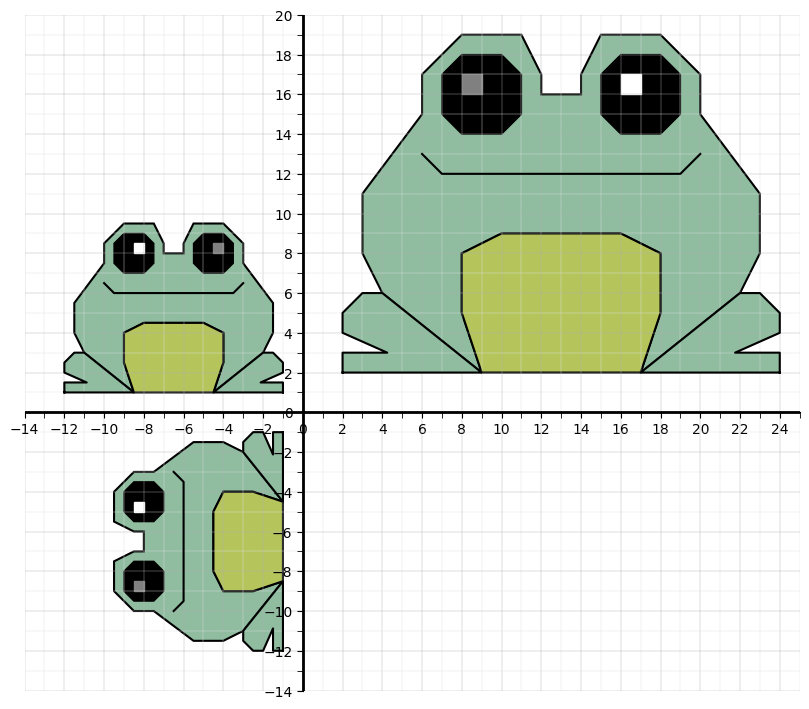

In [87]:
# SETUP CARTESIAN PLANE
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-14, 25)
ax.set_ylim(-14, 20)

ax.set_aspect('equal', adjustable='box')

# Major ticks (every 2 units)
ax.set_xticks(np.arange(-14, 26, 2))
ax.set_yticks(np.arange(-14, 21, 2))

# Minor ticks (every 1 unit)
ax.set_xticks(np.arange(-14, 26, 1), minor=True)
ax.set_yticks(np.arange(-14, 21, 1), minor=True)

# Grid
ax.grid(which='major', color='#b0b0b0', linewidth=0.3)
ax.grid(which='minor', color='#e0e0e0', linewidth=0.3)

# Axes through origin
ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

# Move spines to origin (true Cartesian look)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.tick_params(axis='both', which='both', direction='out', length=4)

# DRAW FROGS

#  Original (Top Right / Center)
draw_complete_frog(ax, np.eye(2), dx=0, dy=0)

#  Scaled + Reflected (Top Left)
T1 = ScaleS_f(0.5, 0.5) @ ReflectionY_f()
draw_complete_frog(ax, T1, dx=0, dy=0)

# Scaled + Rotated 90° Clockwise (Bottom Left)

T2 = ScaleS_f(0.5, 0.5) @ RotatePhi_f(np.pi/2)
draw_complete_frog(ax, T2, dx=0, dy=-13)

plt.show()

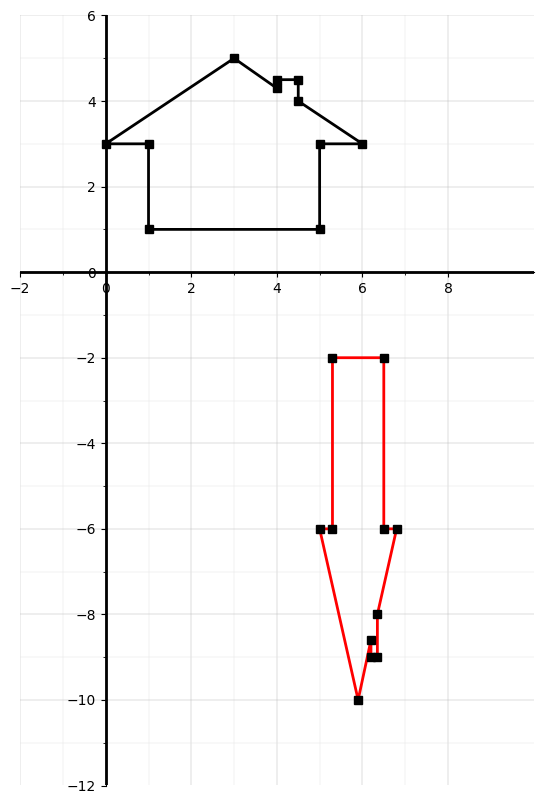

In [109]:
# Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-2, 10)
ax.set_ylim(-12, 6)
ax.set_aspect('equal', adjustable='box')

# Major and minor ticks
ax.set_xticks(np.arange(-2, 9, 2))
ax.set_yticks(np.arange(-12, 7, 2))
ax.set_xticks(np.arange(-2, 9, 1), minor=True)
ax.set_yticks(np.arange(-12, 7, 1), minor=True)

# Grid
ax.grid(which='major', color='#b0b0b0', linewidth=0.3)
ax.grid(which='minor', color='#e0e0e0', linewidth=0.3)

# Axes
ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Draw original house (black, top)
draw_house(ax, np.eye(2), dx=0, dy=0, color='black', linewidth=2)

# Draw transformed house (red, bottom)
# Scale down, reflect over x-axis, then translate
T = ScaleS_f(0.3, 2) @ ReflectionX_f()
draw_house(ax, T, dx=5, dy=0, color='red', linewidth=2)

plt.show()